# GLOBAL TERRORISM REPORT
## Analysed By Ritesh Jaiswal and Ravi Kumar from Nit Jamshedpur
### Exploratory Data Analysis and Future Pridiction

## Introduction:
## (1) Characteristics of the Dataset:
(a) Contains information on over **180,000 terrorist attacks**

(b) Currently the most comprehensive unclassified database on **terrorist attacks in the world**

(c) Includes information on more than **88,000 bombings, 19,000 assassinations,** and 11,000 kidnappings since 1970

(d) Includes information on at least 45 variables for each case, with more recent incidents including information on
    more than 120 variables
.
## (2) Project goals:

(1) Create new metrics, **Kill to Attack Ratio, Weapon Type to Damage Ratio** to quantify values for threat and damage                   assessment.

(2) Calculate meaningful percentages, **compare/contrast different attacks.** What counter measure strategies can be
    adopted ? What strategies have countries adopted so far?
          

(3) **Understanding Attack Patterns.** Not all terror threats are real hence understanding which pose a real threat to
    security, in which regions, the type of probable attack, the terror groups behind them and so on.

(4) Future Prediction. **Predictive and statistical models** can be built to forecast future potential attacks, their 
    locations, type  and to predict candidate terrorist organizations or individuals.


## ------------------------------------------------------------------------------------------------------------------------------

## Part 1: Data Cleansing and Data Prepration

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pycountry 
import geopandas
import mapclassify

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [8]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding ='ISO-8859-1', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
#Rename columns in order to get better format
data.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'State', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype','target1':'Target','natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Group', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Killed', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Wounded', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased','motive':'Motive'},inplace=True)

In [10]:
data['Damage']=data['Killed']+data['Wounded']

In [11]:
#Keep 20 columns
data = data[['Eventid','Year','Month','Day','Country','State', 'Region','City','latitude','longitude','Crit1', 'Crit2', 'Crit3', 
       'Killed','Wounded','Target','Success', 'Suicide', 'Attacktype', 'Targtype','Group', 'Weaptype','Damage']]


In [12]:
data.head(10)

,Eventid,Year,Month,Day,Country,State,Region,City,latitude,longitude,...,Killed,Wounded,Target,Success,Suicide,Attacktype,Targtype,Group,Weaptype,Damage
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,Julio Guzman,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,0.0,0.0,"Nadine Chaval, daughter",1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,1.0,0.0,Employee,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,U.S. Embassy,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,U.S. Consulate,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN
5,197001010002,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,...,0.0,0.0,Cairo Police Headquarters,1,0,Armed Assault,Police,Black Nationalists,Firearms,0.0
6,197001020001,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,...,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,0,0,Assassination,Police,Tupamaros (Uruguay),Firearms,0.0
7,197001020002,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,...,0.0,0.0,Edes Substation,1,0,Bombing/Explosion,Utilities,Unknown,Explosives,0.0
8,197001020003,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,...,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",1,0,Facility/Infrastructure Attack,Military,New Year's Gang,Incendiary,0.0
9,197001030001,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,...,0.0,0.0,Selective Service Headquarters in Madison Wisc...,1,0,Facility/Infrastructure Attack,Government (General),New Year's Gang,Incendiary,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Eventid     181691 non-null  int64  
 1   Year        181691 non-null  int64  
 2   Month       181691 non-null  int64  
 3   Day         181691 non-null  int64  
 4   Country     181691 non-null  object 
 5   State       181270 non-null  object 
 6   Region      181691 non-null  object 
 7   City        181257 non-null  object 
 8   latitude    177135 non-null  float64
 9   longitude   177134 non-null  float64
 10  Crit1       181691 non-null  int64  
 11  Crit2       181691 non-null  int64  
 12  Crit3       181691 non-null  int64  
 13  Killed      171378 non-null  float64
 14  Wounded     165380 non-null  float64
 15  Target      181055 non-null  object 
 16  Success     181691 non-null  int64  
 17  Suicide     181691 non-null  int64  
 18  Attacktype  181691 non-null  object 
 19  Ta

In [14]:
data.describe()

,Eventid,Year,Month,Day,latitude,longitude,Crit1,Crit2,Crit3,Killed,Wounded,Success,Suicide,Damage
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.988530,0.993093,0.875668,2.403272,3.167668,0.889598,0.036507,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.106483,0.082823,0.329961,11.545741,35.949392,0.313391,0.187549,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1570.000000,8191.000000,1.000000,1.000000,9574.000000


In [15]:
data.describe(include='object')

,Country,State,Region,City,Target,Attacktype,Targtype,Group,Weaptype
count,181691,181270,181691,181257,181055,181691,181691,181691,181691
unique,205,2855,12,36674,86006,9,22,3537,12
top,Iraq,Baghdad,Middle East & North Africa,Unknown,Civilians,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives
freq,24636,7645,50474,9775,6461,88255,43511,82782,92426


# (2) Some basic Insights of Distribution of Terrorism Globally:

In [16]:
m=data.groupby('Country')['Country'].count()
m=pd.DataFrame(m)
m.rename(columns={'Country':'Count'},inplace=True)
m.reset_index(inplace=True)
m

,Country,Count
0,Afghanistan,12731
1,Albania,80
2,Algeria,2743
3,Andorra,1
4,Angola,499
...,...,...
200,Yemen,3347
201,Yugoslavia,203
202,Zaire,50
203,Zambia,62


In [17]:

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
m['CODE']=alpha3code(m.Country)

In [18]:
m

,Country,Count,CODE
0,Afghanistan,12731,AFG
1,Albania,80,ALB
2,Algeria,2743,DZA
3,Andorra,1,AND
4,Angola,499,AGO
...,...,...,...
200,Yemen,3347,YEM
201,Yugoslavia,203,None
202,Zaire,50,None
203,Zambia,62,ZMB


In [22]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,m,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Count',ascending=False).reset_index()

In [23]:
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,Country,Count,latitude,longitude
0,70,39192111,Asia,Iraq,IRQ,596700.0,"POLYGON ((39.19547 32.16101, 38.79234 33.37869...",Iraq,24636,33.223191,43.679291
1,77,204924861,Asia,Pakistan,PAK,988200.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Pakistan,14368,30.375321,69.345116
2,78,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,12731,33.939110,67.709953
3,73,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,11960,20.593684,78.962880
4,22,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",Colombia,8306,4.570868,-74.297333
...,...,...,...,...,...,...,...,...,...,...,...
131,133,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,5,42.708678,19.374390
132,1,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,5,24.215527,-12.885834
133,112,339747,Europe,Iceland,ISL,16150.0,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",Iceland,4,64.963051,-19.020835
134,63,2051363,Africa,Gambia,GMB,3387.0,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Gambia,3,13.443182,-15.310139


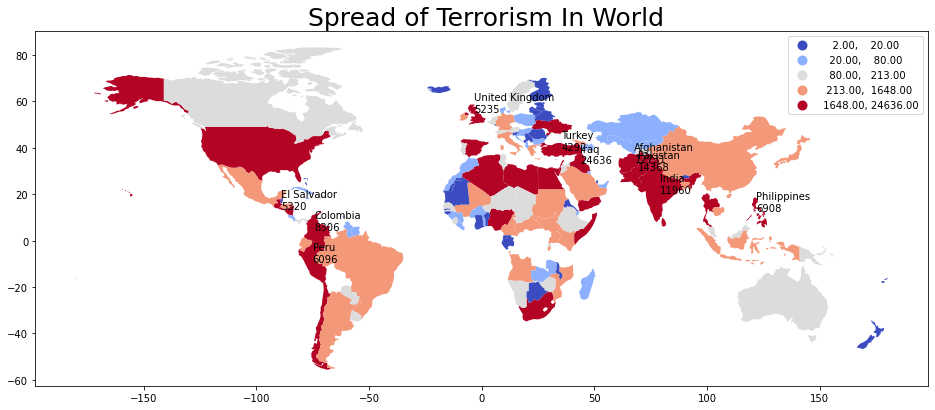

In [21]:
# plot confirmed cases world map 
merge.plot(column='Count', scheme="quantiles",
           figsize=(16, 11),
           legend=True,cmap='coolwarm')
plt.title(' Spread of Terrorism In World',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.Count[i]),size=10)
plt.show()


In [ ]:
plt.figure(figsize=(10,7))
a=data.groupby('Year')['Damage'].sum()
a=pd.DataFrame(a)
a.reset_index(inplace=True)
a

<AxesSubplot:xlabel='Year', ylabel='Number of Damages'>

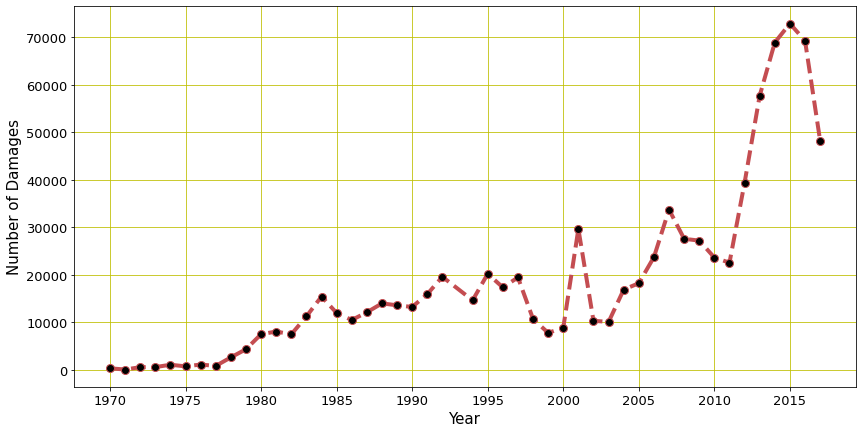

In [19]:
plt.figure(figsize=(14,7))
a=data.groupby('Year')['Damage'].sum().plot(kind='line', linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =8,color = '#C44D51')
plt.grid(color="y",linestyle="-")
plt.xticks(np.arange(1970,2018,5),fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Damages',fontsize=15)
a

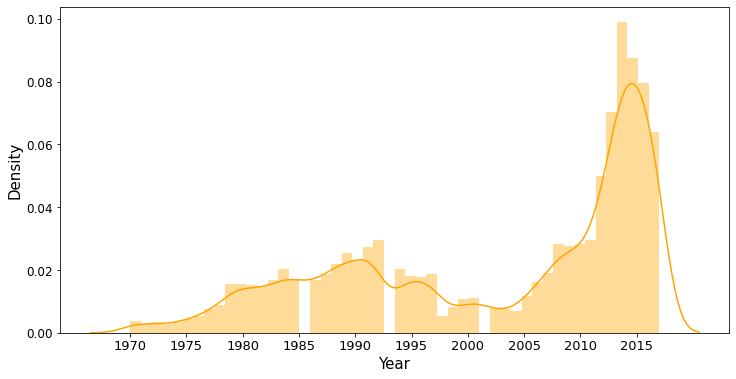

In [20]:
plt.figure(figsize=(12,6))                            #The Bar graph shows that in 2014 number of terror attacks were greatest.
sns.distplot(data['Year'],color='orange')
plt.xticks(np.arange(1970,2018,5),fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

In [21]:
b=data.groupby('Country')['Killed'].sum().sort_values(ascending=False) 
b=b.head(19) #Taking 19 greatest values for simplycity
b=pd.DataFrame(b)
b.reset_index(inplace=True)
b                                                                      # This matrix shows that most people were killed in Iran

,Country,Killed
0,Iraq,78589.0
1,Afghanistan,39384.0
2,Pakistan,23822.0
3,Nigeria,22682.0
4,India,19341.0
5,Sri Lanka,15530.0
6,Syria,15229.0
7,Colombia,14698.0
8,Peru,12771.0
9,El Salvador,12053.0


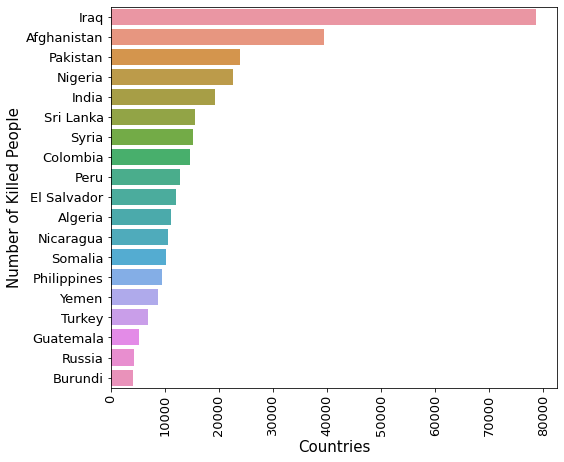

In [22]:
plt.figure(figsize=(8,7))
sns.barplot(b['Killed'],b['Country'])
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of Killed People',fontsize=15)
plt.show()                                                                    # This plot shows Iraq faced most number of kills

In [23]:

a=data['Country'].value_counts().head(9) 
a=pd.DataFrame(a)
a.reset_index(inplace=True)
a.rename(columns={'index':'Countries','Country':'Number of Terror Attacks'},inplace=True)
a

,Countries,Number of Terror Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235


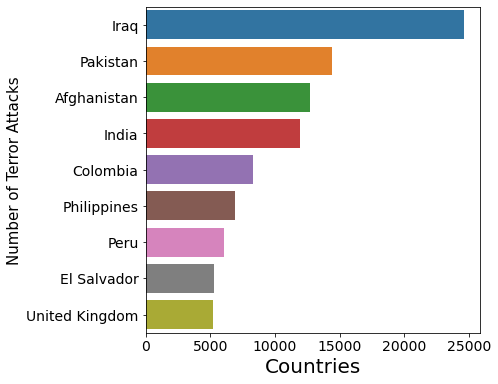

In [24]:
plt.figure(figsize=(6,6))
sns.barplot(a['Number of Terror Attacks'],a['Countries'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Number of Terror Attacks',fontsize=15)
plt.show()                                                           # This graph shows Iraq faced most number of Terror attacks

In [25]:
a=data['Region'].value_counts()
a=pd.DataFrame(a)
a.reset_index(inplace=True)
a.rename(columns={'index':'Region','Region':'Counts'},inplace=True)
a

,Region,Counts
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


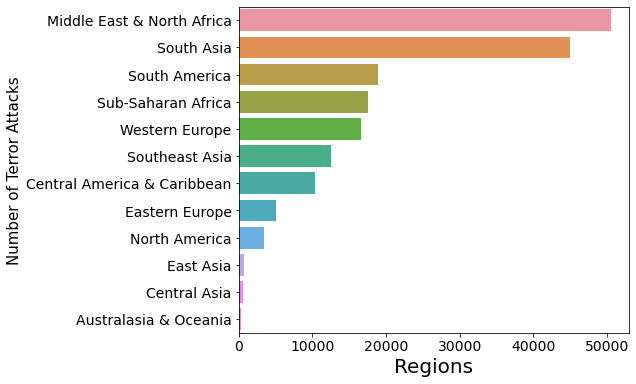

In [26]:
plt.figure(figsize=(7,6))
sns.barplot(a['Counts'],a['Region'])
plt.xlabel('Regions',fontsize=20)
plt.ylabel('Number of Terror Attacks',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()                                                              # This plot shows middle-east regions are most affected 

## (3) Analysis of Terrorist Attack Type and Damage

In [27]:
t=data['Targtype'].value_counts()
t.head()

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: Targtype, dtype: int64

In [28]:
Targ_type_filtered =data['Targtype'].apply(lambda x: x if x in ['Private Citizens & Property','Military','Police','Government (General)',
                                                            'Transportation','Business'] else 'Others(Media,Tourist,NGO,etc)')

In [29]:
d=pd.DataFrame(Targ_type_filtered.value_counts())
d.reset_index(inplace=True)
d.rename(columns={'Targtype':'Number of Attacks','index':'Targetype'},inplace=True)
d

,Targetype,Number of Attacks
0,Private Citizens & Property,43511
1,"Others(Media,Tourist,NGO,etc)",36939
2,Military,27984
3,Police,24506
4,Government (General),21283
5,Business,20669
6,Transportation,6799


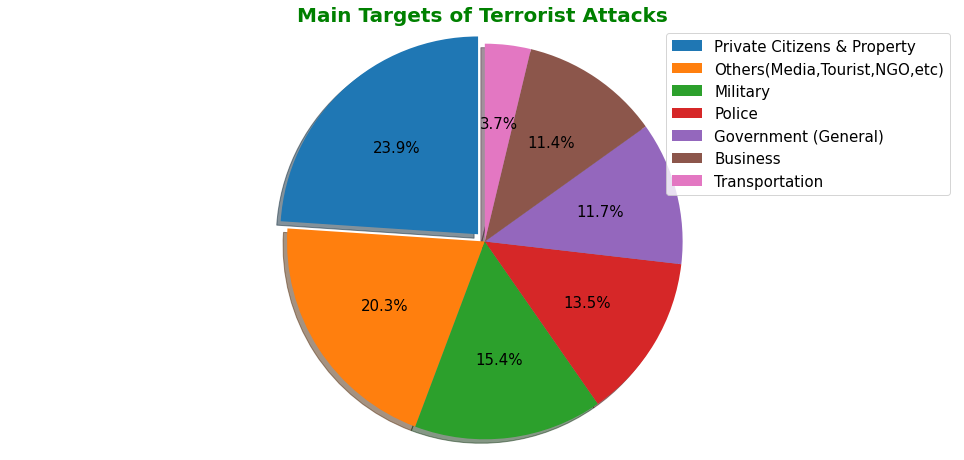

In [30]:
plt.figure(figsize=(13.5,6.5))
plt.pie(d['Number of Attacks'],autopct='%1.1f%%',shadow=True,
explode = (0.05, 0, 0, 0, 0, 0,0),textprops={'fontsize':15,'weight':'light','color':'k'},startangle=90)
plt.title('Main Targets of Terrorist Attacks', fontsize= 20, pad= -70, weight ='bold',color='green')
plt.legend(labels=d['Targetype'],loc='upper right',prop={'size': 15})
plt.axis('equal')                                                               
plt.tight_layout()

In [31]:
#Change some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

In [32]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')

In [33]:
atk_type=atk_filtered.value_counts()
atk_type=pd.DataFrame(atk_type)
atk_type.reset_index(inplace=True)
atk_type.rename(columns={'Attacktype':'Count','index':'AttackType'},inplace=True)
atk_type


,AttackType,Count
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking,12149
4,Facility/Infrastructure Attack,10356
5,Others,8950


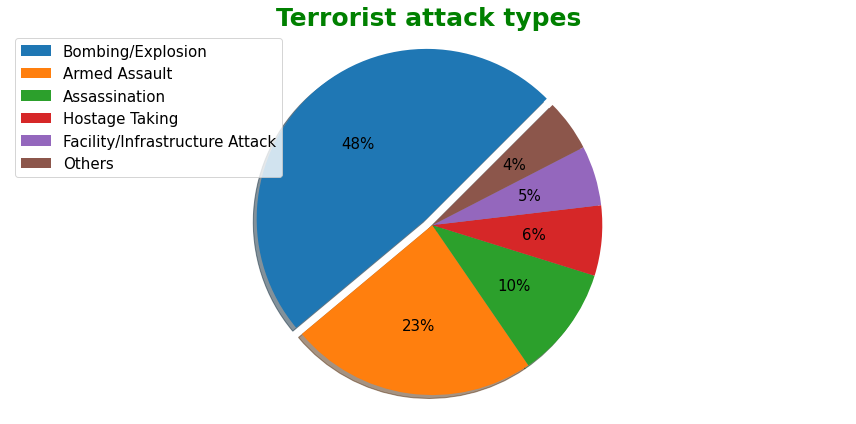

In [34]:
plt.figure(figsize=(12,6))
plt.pie(atk_type['Count'],autopct='%d%%',shadow=True,
explode = (0.05, 0, 0, 0, 0, 0),textprops={'fontsize':15,'weight':'light','color':'k'},startangle=45)
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold',color='green')
plt.legend(labels=atk_type['AttackType'],loc='upper left',prop={'size': 15})
plt.axis('equal')                                                               
plt.tight_layout()

In [35]:
# Create table_1 about Attack types and number of Dead/Injured People

cat = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))

table_1 = data[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,Attacktype,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,514233.0,88255,5.826673
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


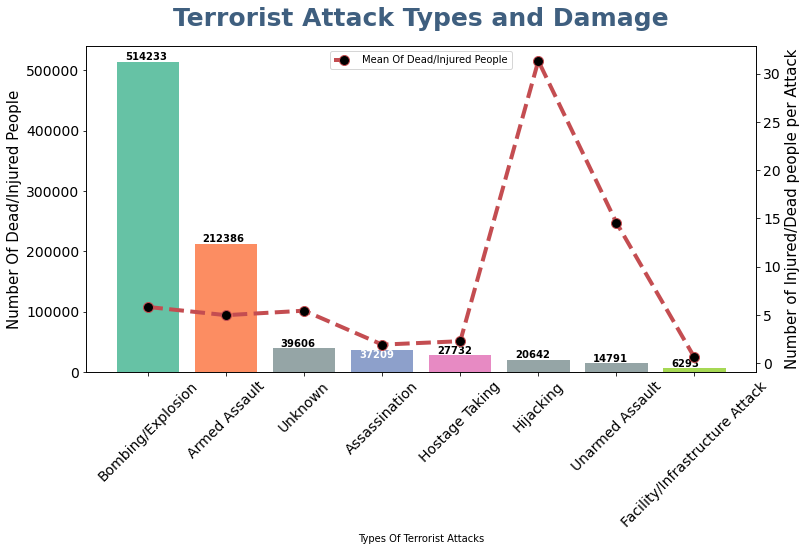

In [38]:
# Draw chart of Terrorist Attack Types and the Damage
labels = table_1['Attacktype'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart
ax1.bar(labels, dmg,
       color = color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')
plt.yticks(fontsize=14)
plt.ylabel('Number of Dead/Injured People',fontsize=15)

# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation=45,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_ylabel('Number of Injured/Dead people per Attack',fontsize=15)

ax2.legend(loc='upper center') 
fig.show()


The total number of dead/injured people caused by **Bombing/Explosion** is the highest (514.233 people) since 48.6% of terrorist attacks belong to this type. However, **Hijacking** is actually the type of attacks which kills and injures the most number of people per attack (>30 people per attack). Facility/Infrastructure Attack type kills the least number of people both in total and per case.

In [38]:
data['Group']=data['Group'].apply(lambda x: x.split('(')[-1][:-1] if '(' in x else x)

In [39]:
h=data.groupby('Group')['Success'].sum().sort_values(ascending=False).head(11)
h=pd.DataFrame(h)
h.reset_index(inplace=True)
h

,Group,Success
0,Unknown,71748
1,Taliban,6680
2,ISIL,4759
3,SL,4337
4,FMLN,3317
5,Al-Shabaab,3016
6,NPA,2457
7,FARC,2302
8,IRA,2283
9,Boko Haram,2247


In [41]:
g=data['Group'].value_counts().sort_values(ascending=False).head(11)
g=pd.DataFrame(g)
g.reset_index(inplace=True)
g.rename(columns={'index':'Group','Group':'Number_of_Attacks'},inplace=True)
g=pd.concat([g,h['Success']],axis=1)
g.drop(index=0,inplace=True)
g['Success_Rate']=(g['Success']/g['Number_of_Attacks'])*100
g['Success_Rate']=g['Success_Rate'].round(decimals=2)
g.reset_index(inplace=True,drop=True)
g.sort_values(by='Number_of_Attacks',ascending=False)
g


,Group,Number_of_Attacks,Success,Success_Rate
0,Taliban,7478,6680,89.33
1,ISIL,5613,4759,84.79
2,SL,4555,4337,95.21
3,FMLN,3351,3317,98.99
4,Al-Shabaab,3288,3016,91.73
5,NPA,2772,2457,88.64
6,IRA,2673,2302,86.12
7,FARC,2487,2283,91.80
8,Boko Haram,2418,2247,92.93
9,PKK,2310,2175,94.16


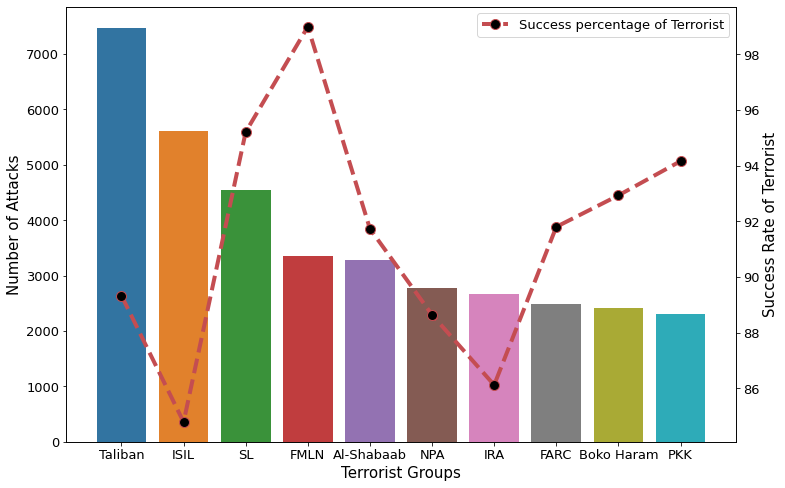

In [42]:
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot(1,1,1)
sns.barplot(g.Group,g.Number_of_Attacks)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('Terrorist Groups',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
ax2=ax1.twinx()
ax2.plot(g.Group,g.Success_Rate,linestyle='--', linewidth =4, marker ='o',markerfacecolor='black',markersize=10,color ='#C44D51',label='Success percentage of Terrorist')
plt.ylabel('Success Rate of Terrorist',fontsize=15)
plt.yticks(fontsize=13)
ax2.legend(fontsize=13)
plt.show()

In [43]:
l=data['Weaptype'].str.split(' ')
data['Weaptype']=l.str[0]
data['Weaptype']

0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: Weaptype, Length: 181691, dtype: object

In [44]:

table_2 = data[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', 
                                                                                             ascending=False)
df_count = data['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage,357.0,141,2.531915
7,Other,225.0,114,1.973684


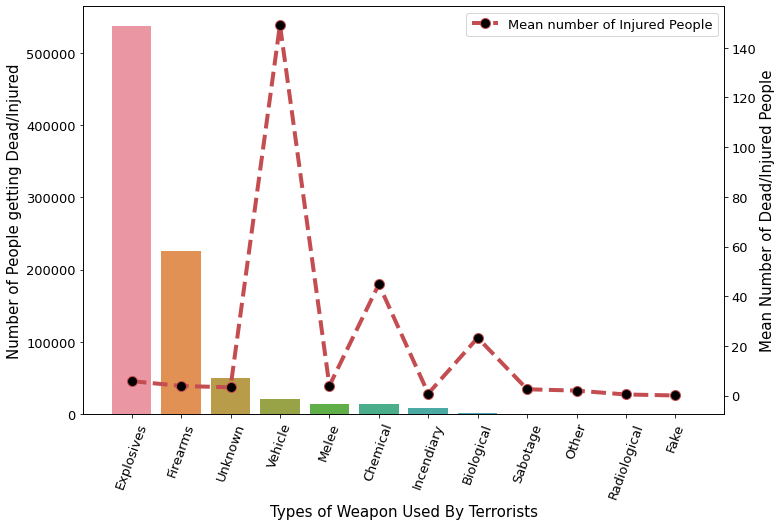

In [45]:
fig=plt.figure(figsize=(11.5,7.5))
ax1=plt.subplot(1,1,1)
sns.barplot(table_2.Weaptype,table_2.Damage)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=70)
plt.xlabel('Types of Weapon Used By Terrorists',fontsize=15)
plt.ylabel('Number of People getting Dead/Injured',fontsize=15)
ax2=ax1.twinx()
ax2.plot(table_2.Weaptype,table_2.Weap_damage_rate,linestyle='--', linewidth =4, marker ='o',markerfacecolor='black',markersize=10,color ='#C44D51',label='Mean number of Injured People')
plt.ylabel('Mean Number of Dead/Injured People',fontsize=15)
plt.yticks(fontsize=13)
ax2.legend(fontsize=13)
plt.show()

In [46]:
s=pd.crosstab(data['Region'],data['Attacktype'],margins=True)
s.drop('All',inplace=True)
s.reset_index(inplace=True)
s.set_index('Region',inplace=True,drop=True)
s.drop('All',inplace=True,axis=1)


In [47]:
s.rename(columns={'Facility/Infrastructure Attack':'Infrastructure Attack','Hostage Taking (Barricade Incident)':'Barricade Incident','Hostage Taking (Kidnapping)':'Kidnapping'},
        inplace=True)

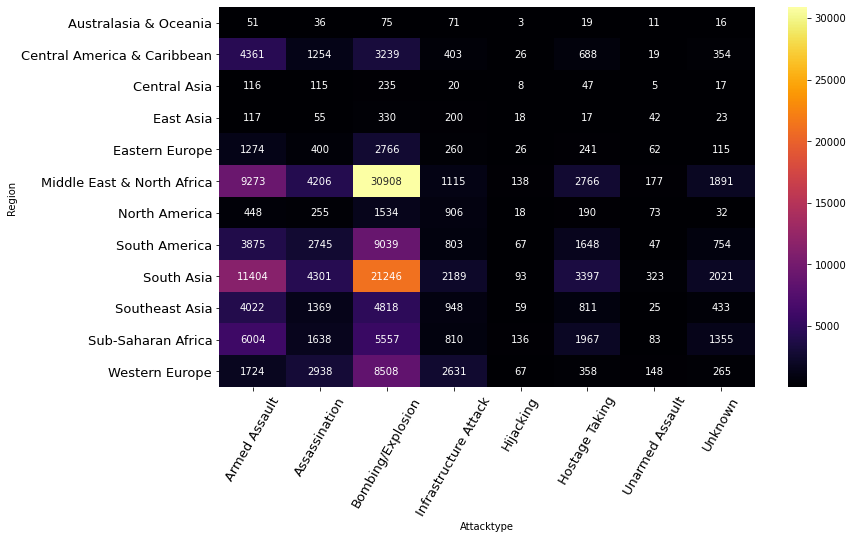

In [48]:
plt.figure(figsize=(12,7))
heatmap=sns.heatmap(s,annot=True,fmt='d',cmap='inferno')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=60,fontsize=13)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=13)
plt.show()

# Future Predictions of Terrorsim by Analysising Data of Past 10 years

In [12]:
data=data[data['Year']>=2007]                                                           # Gives the data from 2007-2017
data

,Eventid,Year,Month,Day,Country,State,Region,City,latitude,longitude,...,Killed,Wounded,Target,Success,Suicide,Attacktype,Targtype,Group,Weaptype,Damage
82108,200701010001,2007,1,1,West Bank and Gaza Strip,Gaza Strip,Middle East & North Africa,Unknown,31.356581,34.326558,...,0.0,0.0,Jamie Ruzuri,1,0,Hostage Taking (Kidnapping),Journalists & Media,Unknown,Firearms,0.0
82109,200701010002,2007,1,1,Thailand,Bangkok ( District ),Southeast Asia,Bangkok,13.727896,100.524124,...,3.0,38.0,Bangkok,1,0,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,41.0
82110,200701010003,2007,1,1,Sri Lanka,Northern,South Asia,Jaffna,9.666399,80.020477,...,1.0,4.0,Military Vehicle,1,0,Bombing/Explosion,Military,Liberation Tigers of Tamil Eelam (LTTE),Explosives,5.0
82111,200701010004,2007,1,1,Afghanistan,Nangarhar,South Asia,Behsud,34.467964,70.491493,...,0.0,0.0,Behsud (District) UNICEF built school,1,0,Facility/Infrastructure Attack,Educational Institution,Taliban,Incendiary,0.0
82112,200701010005,2007,1,1,Pakistan,Balochistan,South Asia,Dera Bugti,29.034412,69.158661,...,0.0,0.0,Main gas pipeline and tow power pylons in Balo...,1,0,Bombing/Explosion,Utilities,Baloch Liberation Army (BLA),Explosives,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,...,1.0,2.0,Checkpoint,1,0,Armed Assault,Military,Al-Shabaab,Firearms,3.0
181687,201712310029,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,...,2.0,7.0,Hmeymim Air Base,1,0,Bombing/Explosion,Military,Muslim extremists,Explosives,9.0
181688,201712310030,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,...,0.0,0.0,Houses,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0
181689,201712310031,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,...,0.0,0.0,Office,0,0,Bombing/Explosion,Government (General),Unknown,Explosives,0.0


In [13]:
p=data.groupby('Country')['Country'].count()
m=data.groupby('Country')['Damage'].sum()
n=pd.concat([p,m],axis=1)
n.rename(columns={'Country':'Count'},inplace=True)
n.reset_index(inplace=True)
n=n.sort_values(by='Count',ascending=False).head(10)
n

,Country,Count,Damage
65,Iraq,22576,171500.0
105,Pakistan,12066,50966.0
0,Afghanistan,11916,75456.0
62,India,7703,15289.0
110,Philippines,4468,8733.0
123,Somalia,3938,15707.0
103,Nigeria,3748,20629.0
153,Yemen,3197,15995.0
137,Thailand,3186,7916.0
83,Libya,2235,5478.0


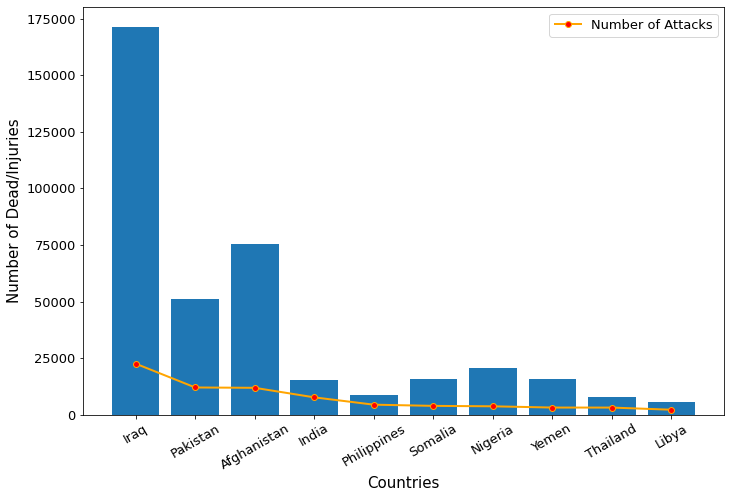

In [14]:
fig=plt.figure(figsize=(11.5,7.5))
ax1=plt.subplot(1,1,1)
ax1.bar(n.Country,n.Damage)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of Dead/Injuries',fontsize=15)
ax1.plot(n.Country,n.Count,linestyle='-', linewidth =2,color ='orange',marker ='o',markerfacecolor='red',label='Number of Attacks')
plt.ylabel('Number of Dead/Injuries',fontsize=15)
plt.yticks(fontsize=13)
ax1.legend(fontsize=13)
plt.show()

In [15]:
p1=data.groupby('Region')['Region'].count()
m1=data.groupby('Region')['Damage'].sum()
n1=pd.concat([p1,m1],axis=1)
n1.rename(columns={'Region':'Count'},inplace=True)
n1.reset_index(inplace=True)
n1=n1.sort_values(by='Count',ascending=False).head(10)
n1

,Region,Count,Damage
5,Middle East & North Africa,37247,240406.0
8,South Asia,33872,147538.0
10,Sub-Saharan Africa,12289,65152.0
9,Southeast Asia,8295,17891.0
4,Eastern Europe,3123,8597.0
11,Western Europe,2211,3066.0
7,South America,1709,3695.0
6,North America,443,2431.0
2,Central Asia,151,321.0
3,East Asia,143,1687.0


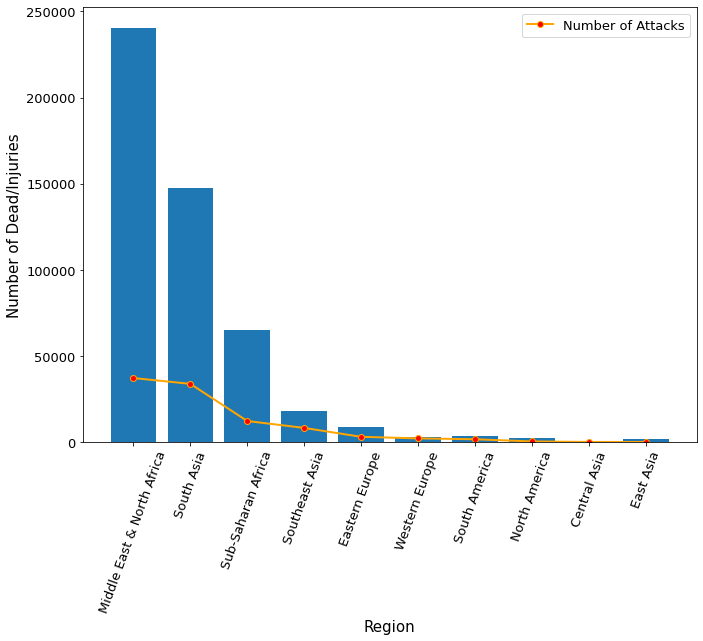

In [16]:
fig=plt.figure(figsize=(11,8))
ax1=plt.subplot(1,1,1)
ax1.bar(n1.Region,n1.Damage)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=70)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Dead/Injuries',fontsize=15)
ax1.plot(n1.Region,n1.Count,linestyle='-', linewidth =2,color ='orange',marker ='o',markerfacecolor='red',label='Number of Attacks')
plt.ylabel('Number of Dead/Injuries',fontsize=15)
plt.yticks(fontsize=13)
ax1.legend(fontsize=13)
plt.show()






In [17]:
data['Attacktype'].nunique()

9

In [18]:
r=data.groupby('Group')['Attacktype'].value_counts()
r=pd.DataFrame(r)
r.rename(columns={'Attacktype':'Counts'},inplace=True)
r.reset_index(inplace=True)
r

,Group,Attacktype,Counts
0,14 March Coalition,Armed Assault,1
1,23 May Democratic Alliance (Algeria),Hostage Taking (Kidnapping),3
2,313 Brigade (Syria),Bombing/Explosion,3
3,A'chik Matgrik Elite Force (AMEF),Bombing/Explosion,2
4,A'chik Matgrik Elite Force (AMEF),Hostage Taking (Kidnapping),2
...,...,...,...
2527,Zimbabwe African Nationalist Union (ZANU),Hostage Taking (Barricade Incident),1
2528,Zintani Militia,Armed Assault,1
2529,Zomi Revolutionary Army (ZRA),Armed Assault,2
2530,Zuwar al-Imam Rida,Hostage Taking (Kidnapping),1


In [25]:
t=pd.crosstab(data['Group'],data['Attacktype'],margins=True)
t.drop(['All','Unknown'],inplace=True)
t.sort_values(by='All',ascending=False,inplace=True)
t.drop(['Unknown'],axis=1,inplace=True)
t=t.head(10)
t

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,All
Group,,,,,,,,,
Taliban,2125,508,2866,235,13,19,713,33,7478
Islamic State of Iraq and the Levant (ISIL),421,117,3679,58,4,20,608,0,5613
Shining Path (SL),1151,834,2161,170,3,24,55,1,4555
Farabundo Marti National Liberation Front (FMLN),1594,128,1408,92,0,55,51,0,3351
Al-Shabaab,973,320,1217,64,27,24,297,8,3288
New People's Army (NPA),1088,393,481,346,15,44,225,2,2772
Irish Republican Army (IRA),301,858,1155,290,3,8,41,2,2671
Revolutionary Armed Forces of Colombia (FARC),733,195,924,123,9,7,325,5,2487
Boko Haram,1024,55,836,162,3,13,191,0,2418


In [22]:
t.rename(columns={'Facility/Infrastructure Attack':'Infrastructure Attack','Hostage Taking (Barricade Incident)':'Barricade Incident','Hostage Taking (Kidnapping)':'Kidnapping'},
        inplace=True)

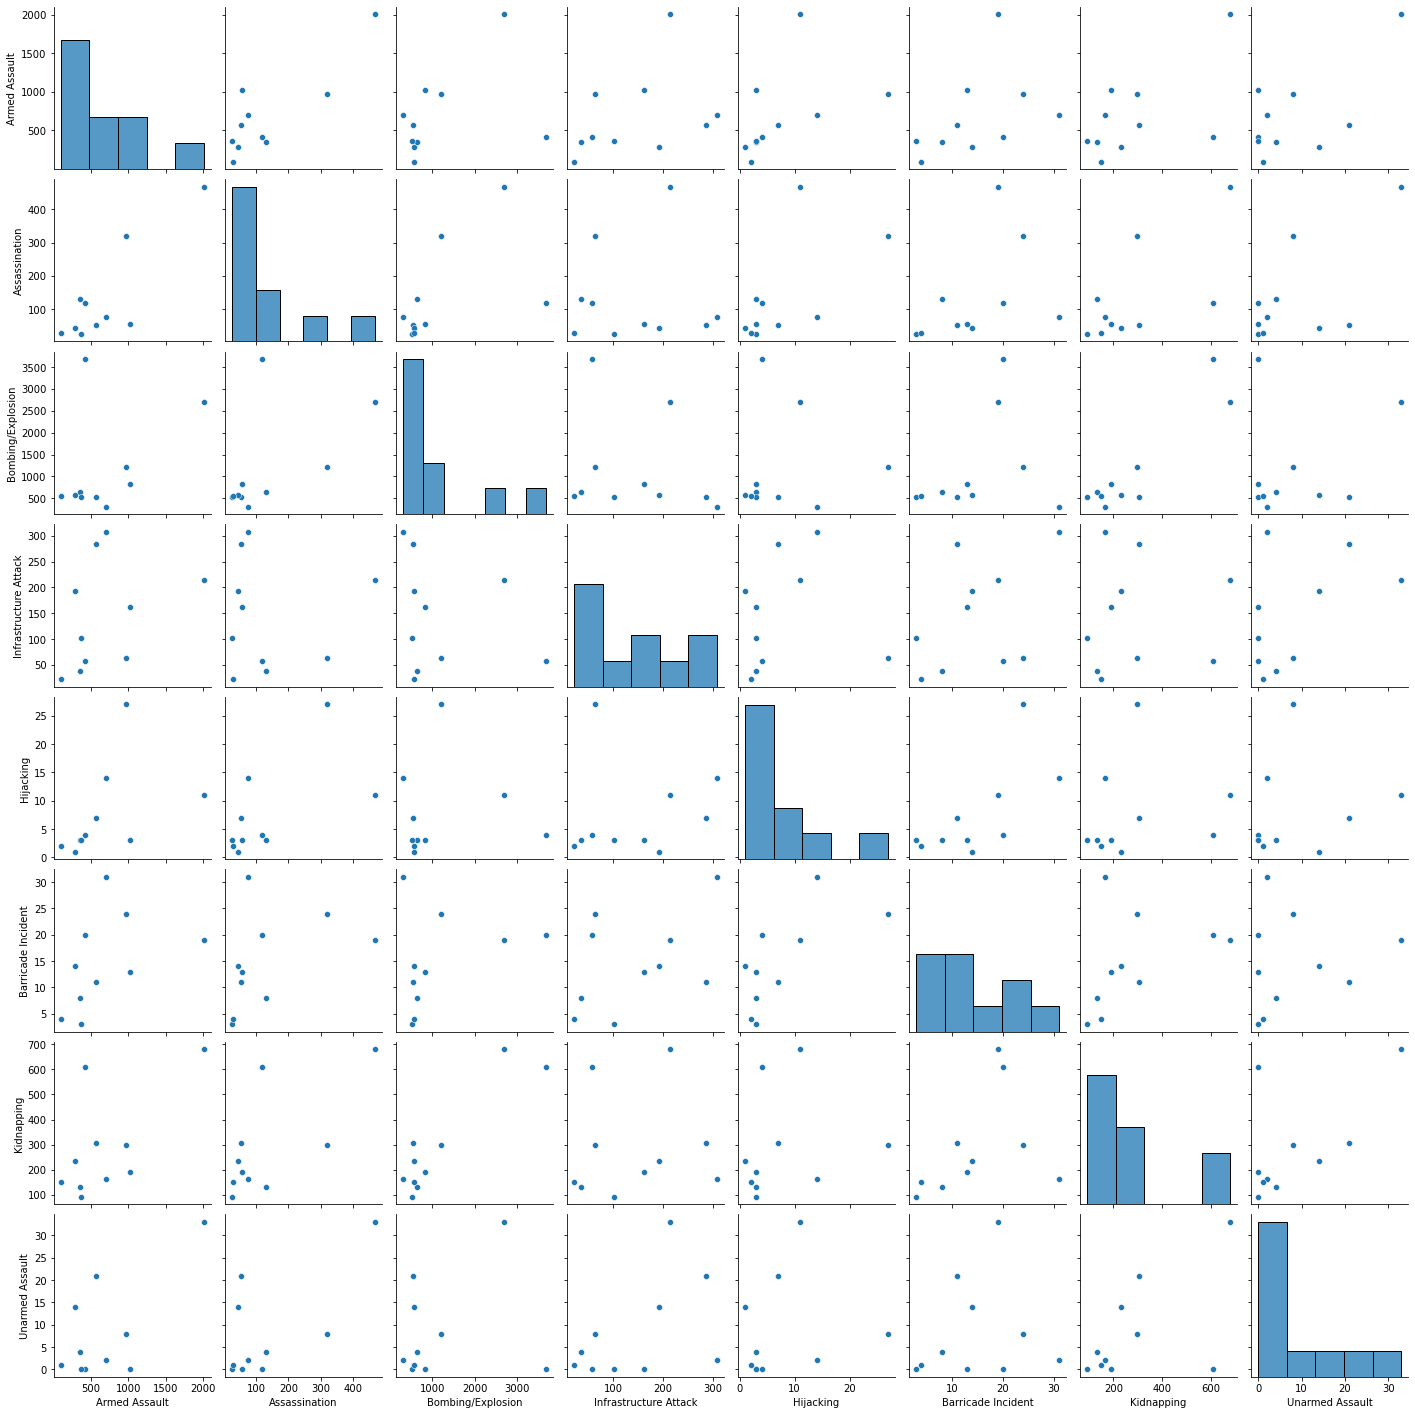

In [23]:
sns.pairplot(t)

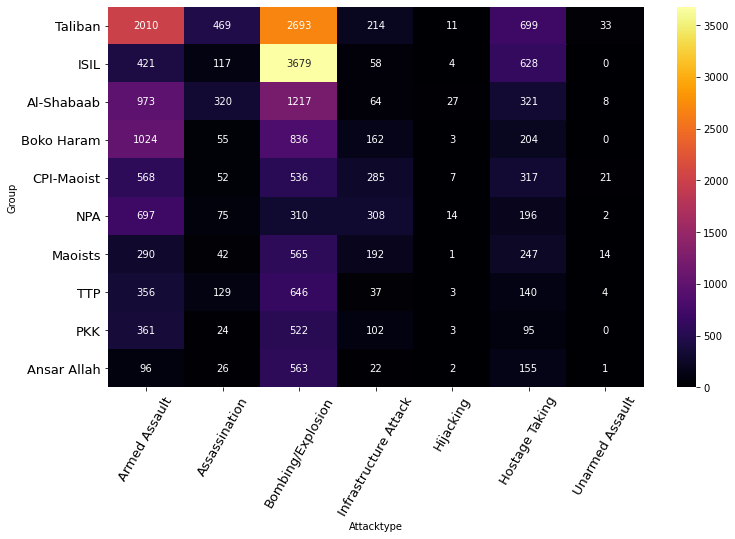

In [94]:
plt.figure(figsize=(12,7))
heatmap=sns.heatmap(t,annot=True,fmt='d',cmap='inferno')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=60,fontsize=13)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=13)
plt.show()

Above heatmap shows the names of top terrorist groups and **Bombing and explosion,Armed Assaluts and Hostage** taking are most frequent type of attack done by Terrorist in past 10 years so in future too they may probably use thsee attacktype